In [33]:
import numpy as np

Haroratni Farengeytdan Selsiyga aylantiruvchi Python funksiyasini yozing. Bu funksiyani haroratlar massiviga qo‘llash uchun numpy.vectorize dan foydalaning: [32, 68, 100, 212, 77]. Formula: 
$$
𝐶 = ( 𝐹 − 32 ) × 5 / 9
$$

In [22]:
def convert_far_celsiy(f):
    return (f - 32) * 5 / 9

vfunc = np.vectorize(convert_far_celsiy)

a = np.array([32, 68, 100, 212, 77])

vfunc([32, 68, 100, 212, 77])

array([  0.        ,  20.        ,  37.77777778, 100.        ,
        25.        ])

Ikkita argumentni qabul qiladigan maxsus funksiya yarating: raqam va quvvat. Ikki massivdagi har bir son juftligi uchun quvvatni hisoblash uchun numpy.vectorize dan foydalaning: [2, 3, 4, 5] va [1, 2, 3, 4].

In [27]:
def power_function(x, y):
    return x ** y

vectorized_power = np.vectorize(power_function)

x = np.array([2, 3, 4, 5])
y = np.array([1, 2, 3, 4])

vectorized_power(x, y)


array([  2,   9,  64, 625])

Numpy yordamida tenglamalar tizimini yeching: 
$$
\begin{cases}
4𝑥 + 5𝑦 + 6𝑧 = 7 \\
3𝑥 − 𝑦 + 𝑧 = 4 \\
2𝑥 + 𝑦 − 2𝑧 = 5
\end{cases}
$$

In [31]:
W = np.array([
    [4, 5, 6],
    [3, -1, 1],
    [2, 1, -2]
])
Y = np.array([7, 4, 5])

func_system = np.linalg.solve(W, Y)
func_system

np.float64(7.0)

Quyidagi elektr zanjiri tenglamalarini hisobga olib, eching 𝐼 1 , 𝐼 2 , 𝐼 3 (filiallardagi oqimlar):
$$
\begin{cases}
10𝐼_1 - 2𝐼_2 + 3𝐼_3 = 12 \\
-2𝐼_1 + 8𝐼_2 - 𝐼_3 = - 5 \\
3𝐼_1 - 𝐼_2 + 6𝐼_3 = 15
\end{cases}

In [32]:
W = np.array([
    [10, -2, 3],
    [-2, 8, -1],
    [3, -1, 6]
])
Y = np.array([12, -5, 15])

func1_system = np.linalg.solve(W, Y)
func1_system

array([ 0.48963731, -0.2253886 ,  2.21761658])

NumPy va PIL yordamida tasvirni manipulyatsiya qilish Tasvir fayli: images/birds.jpg. Sizning vazifangiz tasvirni o'qish va saqlash uchun PIL-dan foydalangan holda NumPy kutubxonasi yordamida quyidagi rasm manipulyatsiyalarini bajarishdir. Ko'rsatmalar: Tasvirni aylantiring: Tasvirni gorizontal va vertikal (chapdan o'ngga va yuqoridan pastga) aylantiring. Tasodifiy shovqin qo'shing: Tasvirga tasodifiy shovqin qo'shing. Kanallarni yoritish: Kanallarning yorqinligini (r.g. qizil kanal) belgilangan qiymatga (masalan, 40) oshiring. Qiymatlar 0 dan 255 gacha bo'lgan diapazonda qolishini ta'minlash uchun ularni kesib tashlang. Maskani qo'llang: Ushbu hududdagi barcha piksel qiymatlarini qora rangga (0, 0, 0) o'rnatish orqali tasvirdagi to'rtburchaklar hududni (masalan, markazdagi 100x100 maydon) niqoblang. Talablar: PIL modulidan quyidagi maqsadlarda foydalaning: Rasmni o'qing. Numpy massivini rasmga o'zgartiring. O'zgartirilgan rasmni yana faylga saqlang. NumPy funksiyalaridan foydalangan holda barcha manipulyatsiyalarni bajaring. PIL yoki boshqa kutubxonalardagi tasvirni tahrirlash funksiyalaridan foydalanmang. Bonus sinovi: Kodning modulliligi va qayta ishlatilishini rag'batlantirish uchun har bir manipulyatsiya uchun funktsiya yarating (masalan, flip_image, add_noise, lighten_channels, apply_mask).

In [36]:
import numpy as np
from PIL import Image
file_path='../images/rabbit.jpg'

In [37]:
def img_read():
    with Image.open(file_path, mode='r') as img:
        img = img.convert('RGB')
        img_arr = np.array(img)
    return img_arr
    
def flip_image(save_path):
    with Image.open(file_path, mode='r') as img:
        # img.transpose(method=Image.FLIP_TOP_BOTTOM)
        image_array = np.array(img)
    image = image_array[:, ::-1, :]
    image = Image.fromarray(a)
    image.save(save_path)
    return img.show()
    


def add_noise(save_path):
    with Image.open(file_path, mode='r') as img:
        img_arr = np.array(img)
    noise = np.random.normal(0, 25, img_arr.shape) 
    noisy_image = img_arr + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    noisy_image = Image.fromarray(noisy_image)
    noisy_image.save(save_path)
    return noisy_image.show()

def brighten_channels(save_path):
    increase_value = 40
    with Image.open('../images/birds.jpg') as img:
        image_array = np.array(img)
    image_array[:, :, 0] = np.clip(image_array[:, :, 0] + increase_value, 0, 255)
    image_array[:, :, 1] = np.clip(image_array[:, :, 1] + increase_value, 0, 255)
    image_array[:, :, 2] = np.clip(image_array[:, :, 2] + increase_value, 0, 255)
    new_img = Image.fromarray(image_array.astype(np.uint8))
    new_img.save(save_path)
    return new_img.show()


def apply_mask(save_path):
    with Image.open('../images/birds.jpg') as img:
        image_array = np.array(img)
    image_array[50:243, :, :] = image_array[50:243, :, :] * np.zeros([193, 236, 3]).astype(int)
    image = Image.fromarray(image_array.astype(np.uint8))
    image.save(save_path)
    return image.show()
        


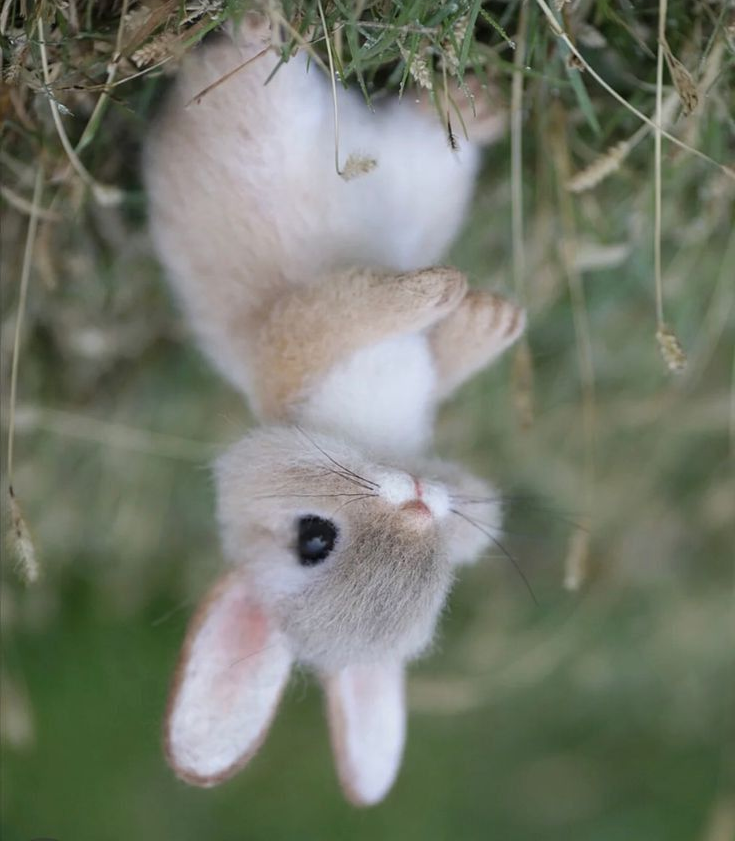

In [115]:
with Image.open(file_path, mode='r') as img:
    # img = img.transpose(method=Image.FLIP_LEFT_RIGHT) #FLIP_TOP_BOTTOM
    image_array = np.array(img)
a = image_array[::-1, ::-1, :]
a = Image.fromarray(a)
display(a)
        

In [113]:
a = [1, 2, 3]
a[::-1]

[3, 2, 1]